In [1]:
# Data wrangling 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [3]:
anz=pd.read_pickle('D:/Data Science Projects 21-22/ANZ Forage/anz.pkl')
anz.drop(["currency", "country"], axis = 1, inplace = True)


In [4]:
anz.head()

,status,card_present_flag,bpay_biller_code,account,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,...,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,day_name,month_name,hour
0,authorized,1.0,NaN,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,...,QLD,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,Wednesday,August,1
1,authorized,0.0,NaN,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,...,NSW,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,Wednesday,August,1
2,authorized,1.0,NaN,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,...,NSW,2018-08-01 01:26:15+00:00,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,Wednesday,August,1
3,authorized,1.0,NaN,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,...,QLD,2018-08-01 01:38:45+00:00,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,Wednesday,August,1
4,authorized,1.0,NaN,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,...,QLD,2018-08-01 01:51:15+00:00,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,Wednesday,August,1


In [5]:
anz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   status             12043 non-null  object             
 1   card_present_flag  7717 non-null   float64            
 2   bpay_biller_code   885 non-null    object             
 3   account            12043 non-null  object             
 4   long_lat           12043 non-null  object             
 5   txn_description    12043 non-null  object             
 6   merchant_id        7717 non-null   object             
 7   merchant_code      883 non-null    float64            
 8   first_name         12043 non-null  object             
 9   balance            12043 non-null  float64            
 10  date               12043 non-null  datetime64[ns]     
 11  gender             12043 non-null  object             
 12  age                12043 non-null  int64      

In [6]:
anz = anz.drop(["merchant_code", "bpay_biller_code"], axis = 1)


In [7]:
anz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   status             12043 non-null  object             
 1   card_present_flag  7717 non-null   float64            
 2   account            12043 non-null  object             
 3   long_lat           12043 non-null  object             
 4   txn_description    12043 non-null  object             
 5   merchant_id        7717 non-null   object             
 6   first_name         12043 non-null  object             
 7   balance            12043 non-null  float64            
 8   date               12043 non-null  datetime64[ns]     
 9   gender             12043 non-null  object             
 10  age                12043 non-null  int64              
 11  merchant_suburb    7717 non-null   object             
 12  merchant_state     7717 non-null   object     

In [10]:
salaries = anz[anz["txn_description"] == "PAY/SALARY"].groupby("customer_id").mean()
salaries.head()

,card_present_flag,balance,age,amount,hour
customer_id,,,,,
CUS-1005756958,NaN,4718.665385,53,970.47,16
CUS-1117979751,NaN,11957.202857,21,3578.65,11
CUS-1140341822,NaN,5841.720000,28,1916.51,16
CUS-1147642491,NaN,8813.467692,34,1711.39,11
CUS-1196156254,NaN,23845.717143,34,3903.73,16


In [11]:
sal =[]
for customer_id in anz['customer_id']:
    sal.append(int(salaries.loc[customer_id]['amount'].sum()))
anz['annual_salary'] = sal
anz.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,day_name,month_name,hour,annual_salary
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,Wednesday,August,1,1013
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,Wednesday,August,1,1013
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,2018-08-01 01:26:15+00:00,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,Wednesday,August,1,1002
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,2018-08-01 01:38:45+00:00,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,Wednesday,August,1,892
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,2018-08-01 01:51:15+00:00,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,Wednesday,August,1,1013


In [13]:
salary = anz[anz['txn_description'] == 'PAY/SALARY']
salary.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,day_name,month_name,hour,annual_salary
50,posted,NaN,ACC-588564840,151.27 -33.76,PAY/SALARY,NaN,Isaiah,8342.11,2018-08-01,M,...,2018-08-01 11:00:00+00:00,3903.95,9ca281650e5d482d9e53f85e959baa66,CUS-1462656821,NaN,credit,Wednesday,August,11,3903
61,posted,NaN,ACC-1650504218,145.01 -37.93,PAY/SALARY,NaN,Marissa,2040.58,2018-08-01,F,...,2018-08-01 12:00:00+00:00,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,CUS-2500783281,NaN,credit,Wednesday,August,12,1626
64,posted,NaN,ACC-3326339947,151.18 -33.80,PAY/SALARY,NaN,Eric,3158.51,2018-08-01,M,...,2018-08-01 12:00:00+00:00,983.36,bd62b1799a454cedbbb56364f7c40cbf,CUS-326006476,NaN,credit,Wednesday,August,12,983
68,posted,NaN,ACC-3541460373,145.00 -37.83,PAY/SALARY,NaN,Jeffrey,2517.66,2018-08-01,M,...,2018-08-01 13:00:00+00:00,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,CUS-1433879684,NaN,credit,Wednesday,August,13,1408
70,posted,NaN,ACC-2776252858,144.95 -37.76,PAY/SALARY,NaN,Kristin,2271.79,2018-08-01,F,...,2018-08-01 13:00:00+00:00,1068.04,f50ccf1195214d14a0acbfcb5a265193,CUS-4123612273,NaN,credit,Wednesday,August,13,1068


In [14]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883 entries, 50 to 12004
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   status             883 non-null    object             
 1   card_present_flag  0 non-null      float64            
 2   account            883 non-null    object             
 3   long_lat           883 non-null    object             
 4   txn_description    883 non-null    object             
 5   merchant_id        0 non-null      object             
 6   first_name         883 non-null    object             
 7   balance            883 non-null    float64            
 8   date               883 non-null    datetime64[ns]     
 9   gender             883 non-null    object             
 10  age                883 non-null    int64              
 11  merchant_suburb    0 non-null      object             
 12  merchant_state     0 non-null      object      

In [15]:
salary.drop(['card_present_flag','merchant_id', "merchant_suburb","merchant_state", 'merchant_long_lat','movement','status','account','long_lat',
         'txn_description','first_name','extraction','transaction_id','customer_id','month_name','day_name','hour'], axis = 1, inplace = True)


C:\Users\91893\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883 entries, 50 to 12004
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   balance        883 non-null    float64       
 1   date           883 non-null    datetime64[ns]
 2   gender         883 non-null    object        
 3   age            883 non-null    int64         
 4   amount         883 non-null    float64       
 5   annual_salary  883 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 48.3+ KB


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [18]:
salary['gender'] = pd.get_dummies(salary['gender'], drop_first=True)

<ipython-input-18-8cd21113f022>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary['gender'] = pd.get_dummies(salary['gender'], drop_first=True)


<AxesSubplot:>

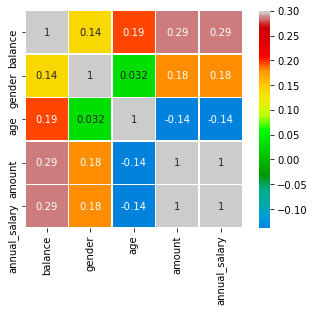

In [19]:
# Plotting the correlation heatmap 
sns.heatmap(salary.corr() ,vmax=.3 ,annot=True, center=0, cmap="nipy_spectral", square=True, linewidths=.5)

In [20]:
X = salary.drop(["date",'annual_salary'],axis=1)
y = salary['annual_salary']

In [21]:
X.shape, y.shape

((883, 4), (883,))

In [23]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.3)


In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train) # Fit the model
y_pred_train_lr = lr.predict(X_train) #train model prediction
print("Model accuracy on Train Data", (lr.score(X_train , y_train)*100)) # Model Score on train data 
y_pred_lr = lr.predict(X_test) # Making predictions
print("Model accuracy on Train Data", lr.score(X_test , y_test)*100) # Model Score on test data 


Model accuracy on Train Data 99.99999471257117
Model accuracy on Train Data 99.99999401568877


In [26]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train) # Fit the model
y_pred_train_dtr = dtr.predict(X_train) #train model prediction
print("Model accuracy on Train Data", (dtr.score(X_train , y_train)*100)) # Model Score on train data 
y_pred_dtr = dtr.predict(X_test) # Making predictions
print("Model accuracy on Test Data", dtr.score(X_test , y_test)*100) # Model Score on test data 


Model accuracy on Train Data 100.0
Model accuracy on Test Data 99.99861513780337
